In [25]:
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper")

In [26]:
(scores_file, plot_file) = ((snakemake.input[0], snakemake.output[0]) if "snakemake" in globals()
                            else ("../../results/delay-vs-drop/scores.csv",  "../../results/plots/delay-vs-drop.pdf"))

In [32]:
plot_data = pd.melt(pd.read_csv(scores_file), id_vars=["sample", "rate", "dir"], var_name="metric")
plot_data[["mode", "defence", "sample_id"]] = plot_data["sample"].str.split("/", expand=True)
plot_data

,sample,rate,dir,metric,value,mode,defence,sample_id
0,delay/front/0000_00,5ms,in,pearsonr,0.697796,delay,front,0000_00
1,delay/front/0000_00,5ms,out,pearsonr,0.023829,delay,front,0000_00
2,delay/front/0000_00,25ms,in,pearsonr,0.970857,delay,front,0000_00
3,delay/front/0000_00,25ms,out,pearsonr,0.819083,delay,front,0000_00
4,delay/front/0000_00,50ms,in,pearsonr,0.986561,delay,front,0000_00
...,...,...,...,...,...,...,...,...
6700,drop/tamaraw/0099_00,5ms,out,scaled_dtw,0.768083,drop,tamaraw,0099_00
6701,drop/tamaraw/0099_00,25ms,in,scaled_dtw,0.083397,drop,tamaraw,0099_00
6702,drop/tamaraw/0099_00,25ms,out,scaled_dtw,1.900644,drop,tamaraw,0099_00
6703,drop/tamaraw/0099_00,50ms,in,scaled_dtw,0.046027,drop,tamaraw,0099_00


In [33]:
metrics = ["pearsonr", "scaled_euclidean", "scaled_dtw"]
plot_data = plot_data[plot_data["metric"].isin(metrics)]
plot_data["metric"] = plot_data["metric"].replace({
    "pearsonr": "Pearson Correlation",
    "scaled_dtw": "DTW",
    "scaled_euclidean": "Euclidean"
})
plot_data["defence"] = plot_data["defence"].replace({
    "front": "FRONT",
    "tamaraw": "Tamaraw",
})
plot_data = plot_data[plot_data["dir"] == "in"]
plot_data

,sample,rate,dir,metric,value,mode,defence,sample_id
0,delay/front/0000_00,5ms,in,Pearson Correlation,0.697796,delay,FRONT,0000_00
2,delay/front/0000_00,25ms,in,Pearson Correlation,0.970857,delay,FRONT,0000_00
4,delay/front/0000_00,50ms,in,Pearson Correlation,0.986561,delay,FRONT,0000_00
6,delay/tamaraw/0000_00,5ms,in,Pearson Correlation,0.485856,delay,Tamaraw,0000_00
8,delay/tamaraw/0000_00,25ms,in,Pearson Correlation,0.771745,delay,Tamaraw,0000_00
...,...,...,...,...,...,...,...,...
6695,drop/front/0099_00,25ms,in,DTW,0.272782,drop,FRONT,0099_00
6697,drop/front/0099_00,50ms,in,DTW,0.377439,drop,FRONT,0099_00
6699,drop/tamaraw/0099_00,5ms,in,DTW,0.288134,drop,Tamaraw,0099_00
6701,drop/tamaraw/0099_00,25ms,in,DTW,0.083397,drop,Tamaraw,0099_00


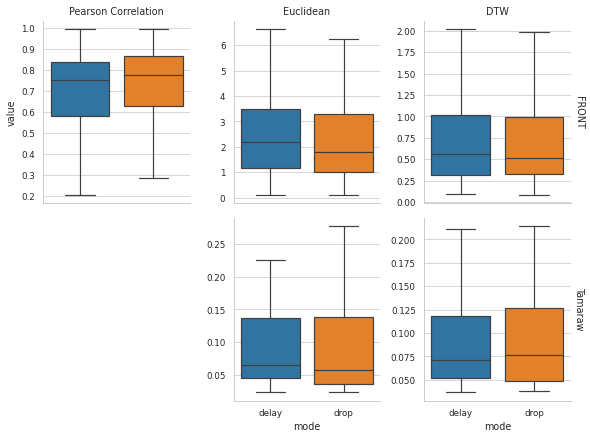

In [37]:
def plot_scores(data):
    # Select a single rate, dropping all rows that failed
    result = data[data["rate"] == "25ms"].drop(columns=["rate", "sample"])
    grid = sns.catplot(data=result, x="mode", y="value", col="metric", row="defence", sharey=False, kind="box", height=3, aspect=0.9, showfliers=False,
                       margin_titles=True, legend=False)
    grid.set_titles(col_template="{col_name}", row_template="{row_name}")
    grid.axes[1, 0].remove()
    return grid
    
plot_scores(plot_data).savefig(plot_file)